In [1]:
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split

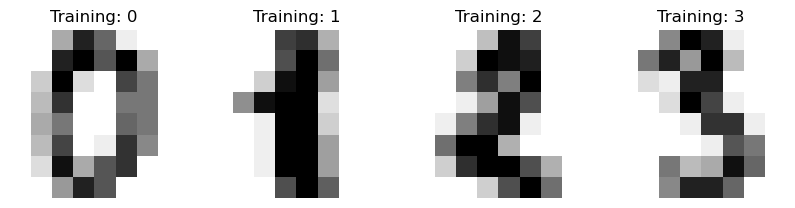

In [3]:
### load dataset 

digits = datasets.load_digits()

### show training data
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10,3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [4]:
from sklearn.tree import DecisionTreeClassifier
# gini a criterion to minimize the probability of misclassification
clf_dt = DecisionTreeClassifier(criterion = 'gini')

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, shuffle=True)


clf_dt.fit(X_train, y_train)
predicted = clf_dt.predict(X_test)
print(predicted)

[5 6 1 6 5 7 1 5 3 7 4 1 2 5 4 9 8 2 6 6 0 5 4 9 7 4 8 7 5 6 5 3 8 9 9 6 1
 1 0 6 8 4 8 8 8 1 2 7 1 2 0 1 8 8 9 6 4 6 7 0 4 1 0 5 4 1 7 2 0 6 7 9 1 5
 5 4 0 6 6 2 5 4 1 1 0 9 5 6 5 0 5 1 5 1 3 0 2 5 8 0 1 9 1 1 7 0 6 4 9 8 7
 3 7 4 4 2 7 3 6 2 6 1 9 7 4 8 5 5 1 3 9 4 3 7 8 0 5 8 9 5 5 0 0 5 0 6 1 8
 8 4 0 4 5 0 1 7 6 9 7 9 5 7 5 6 9 5 0 6 9 6 7 6 2 0 3 3 8 4 9 7 1 2 9 5 5
 7 0 9 1 4 6 1 4 0 5 4 9 6 7 1 6 8 1 7 0 7 0 1 5 7 1 6 1 5 1 6 6 7 3 2 7 3
 6 4 2 5 1 2 4 6 4 8 1 2 2 5 6 2 4 8 5 6 3 1 6 8 2 8 3 9 7 1 5 7 3 4 8 4 5
 1 5 4 3 9 0 1 9 5 4 1 4 3 2 2 4 5 7 6 2 0 9 2 6 4 6 8 4 4 5 8 0 4 1 1 3 4
 8 3 3 5 6 3 3 6 7 0 8 3 4 2 8 5 1 0 8 4 7 1 6 3 6 2 7 0 5 8 2 0 0 0 1 3 0
 7 8 8 5 1 0 6 8 2 0 0 5 9 7 5 4 5 7 6 3 5 3 9 3 5 5 3]


In [5]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test , predicted)

0.8805555555555555

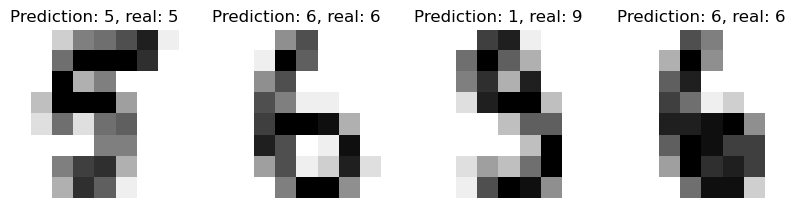

In [6]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10,3))
for ax, image, prediction, t in zip(axes, X_test, predicted, y_test):
    ax.set_axis_off()
    image = image.reshape(8,8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}, real: {t}")

Confusion Matrix:
[[36  0  0  0  0  1  0  0  0  0]
 [ 0 37  1  1  0  0  0  0  2  1]
 [ 0  0 21  0  0  0  0  0  2  0]
 [ 0  0  4 26  0  2  1  0  1  1]
 [ 0  1  0  0 31  0  1  0  0  0]
 [ 0  0  0  0  2 43  0  1  0  0]
 [ 1  1  0  0  4  0 40  0  0  0]
 [ 0  0  0  0  1  1  0 34  1  0]
 [ 0  3  0  0  0  1  0  0 27  2]
 [ 0  2  0  1  1  2  0  0  0 22]]


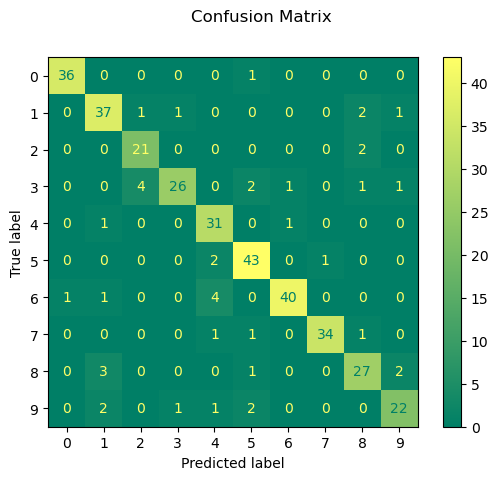

In [7]:
### confusion matrix

disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted, cmap="summer")
disp.figure_.suptitle("Confusion Matrix")

print(f"Confusion Matrix:\n{disp.confusion_matrix}")

plt.show()

In [8]:
print(
    f"Classification report for classifier {clf_dt}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        37
           1       0.84      0.88      0.86        42
           2       0.81      0.91      0.86        23
           3       0.93      0.74      0.83        35
           4       0.79      0.94      0.86        33
           5       0.86      0.93      0.90        46
           6       0.95      0.87      0.91        46
           7       0.97      0.92      0.94        37
           8       0.82      0.82      0.82        33
           9       0.85      0.79      0.81        28

    accuracy                           0.88       360
   macro avg       0.88      0.88      0.88       360
weighted avg       0.89      0.88      0.88       360


